<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/BA820_Group7_Milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning for College Categorization: Identifying Institutional Profiles for Prospective Students  - BA820 A1 Team 7 - Part 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preparation**

## Data Cleaning

### Load and Inspect Data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/BA820 Project/MERGED2022_23_PP.csv")
#df = pd.read_csv("MERGED2022_23_PP.csv")
#df = pd.read_csv("/content/drive/MyDrive/2024-2025/Spring Semester/Unsupervised and Unstructured Machine Learning/BA820 Project/MERGED2022_23_PP.csv")

<ipython-input-115-fe35b3c0d2da>:3: DtypeWarning:

Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   
3                        www.uah.edu/   
4                      www.alasu.edu/   

                                              NPCURL  ...  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1  https://tcc.ruffalonl.com/University of Alabam...  ...   
2           https://www2.amridgeuniversity.edu:9091/  ...   
3                                    finaid.uah.edu/  ...   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...  ...   

   COUNT_WNE_MALE0_P11  COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  \
0                  NaN                  NaN               NaN   
1                  NaN                  NaN               NaN   
2                  NaN                  NaN               NaN   
3                  NaN                  NaN               NaN   
4                  NaN                  NaN               NaN   

   MD_EARN_WNE_INC1_P11  MD_EARN_WNE_INC2_P11  MD_EARN_WNE_INC3_P11  \
0                   NaN                   NaN                   NaN   
1                   NaN                   NaN                   NaN   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4                   NaN                   NaN                   NaN   

   MD_EARN_WNE_INDEP0_P11  MD_EARN_WNE_INDEP1_P11  MD_EARN_WNE_MALE0_P11  \
0                     NaN                     NaN                    NaN   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                     NaN                     NaN                    NaN   
4                     NaN                     NaN                    NaN   

   MD_EARN_WNE_MALE1_P11  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 3305 columns]

In [ ]:
df.shape

(6484, 3305)

**Analysis**

When loading and inspecting the data for the first time, it was clear that we would have to significantly reduce the total number of columns from the initial 3,305. While we intended to employ dimensionality reduction techniques, we knew it would be in our best interest to first try to reduce the number of columns using simple techniques to eliminate objectively incomplete and non-informative features.

Given the context of this project, our initial intention was to keep all rows representing individual colleges and provide a truly comprehensive rating of all US colleges.



In [ ]:
df.describe()

UNITID         OPEID        OPEID6  SCH_DEG         HCM2  \
count  6.484000e+03  6.458000e+03   6458.000000      0.0  6484.000000   
mean   2.261726e+06  1.746369e+06  16983.646175      NaN     0.006169   
std    7.805306e+06  2.161007e+06  15226.256135      NaN     0.078307   
min    1.006540e+05  1.002000e+05   1002.000000      NaN     0.000000   
25%    1.742222e+05  3.045250e+05   3035.250000      NaN     0.000000   
50%    2.288965e+05  1.019803e+06  10152.000000      NaN     0.000000   
75%    4.576172e+05  3.083710e+06  30829.750000      NaN     0.000000   
max    4.966450e+07  8.209882e+07  43064.000000      NaN     1.000000   

              MAIN    NUMBRANCH      PREDDEG      HIGHDEG      CONTROL  ...  \
count  6484.000000  6484.000000  6484.000000  6484.000000  6484.000000  ...   
mean      0.788865     3.191703     1.836212     2.247224     2.057989  ...   
std       0.408146     6.809394     1.084154     1.381255     0.832232  ...   
min       0.000000     1.000000     0.000000     0.000000     1.000000  ...   
25%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       1.000000     1.000000     2.000000     2.000000     2.000000  ...   
75%       1.000000     2.000000     3.000000     4.000000     3.000000  ...   
max       1.000000    52.000000     4.000000     4.000000     3.000000  ...   

       COUNT_WNE_MALE0_P11  COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  \
count                  0.0                  0.0               0.0   
mean                   NaN                  NaN               NaN   
std                    NaN                  NaN               NaN   
min                    NaN                  NaN               NaN   
25%                    NaN                  NaN               NaN   
50%                    NaN                  NaN               NaN   
75%                    NaN                  NaN               NaN   
max                    NaN                  NaN               NaN   

       MD_EARN_WNE_INC1_P11  MD_EARN_WNE_INC2_P11  MD_EARN_WNE_INC3_P11  \
count                   0.0                   0.0                   0.0   
mean                    NaN                   NaN                   NaN   
std                     NaN                   NaN                   NaN   
min                     NaN                   NaN                   NaN   
25%                     NaN                   NaN                   NaN   
50%                     NaN                   NaN                   NaN   
75%                     NaN                   NaN                   NaN   
max                     NaN                   NaN                   NaN   

       MD_EARN_WNE_INDEP0_P11  MD_EARN_WNE_INDEP1_P11  MD_EARN_WNE_MALE0_P11  \
count                     0.0                     0.0                    0.0   
mean                      NaN                     NaN                    NaN   
std                       NaN                     NaN                    NaN   
min                       NaN                     NaN                    NaN   
25%                       NaN                     NaN                    NaN   
50%                       NaN                     NaN                    NaN   
75%                       NaN                     NaN                    NaN   
max                       NaN                     NaN                    NaN   

       MD_EARN_WNE_MALE1_P11  
count                    0.0  
mean                     NaN  
std                      NaN  
min                      NaN  
25%                      NaN  
50%                      NaN  
75%                      NaN  
max                      NaN  

[8 rows x 2777 columns]

In [ ]:
# Preserve Institution Names (Added during M2 for accurate mapping of clusters)
inst_names = df['INSTNM']

### Drop Columns at Different "Null Thresholds"

In [ ]:
# If a column has more than 50% missing values --> drop it
missing_values = df.isnull().sum() / len(df) * 100
cols_missing = missing_values[missing_values > 50]
dropped_df = df.drop(columns = cols_missing.index)

print(f"Columns dropped: {len(cols_missing)}")
print(f"New DataFrame shape: {dropped_df.shape}")

Columns dropped: 2355
New DataFrame shape: (6484, 950)


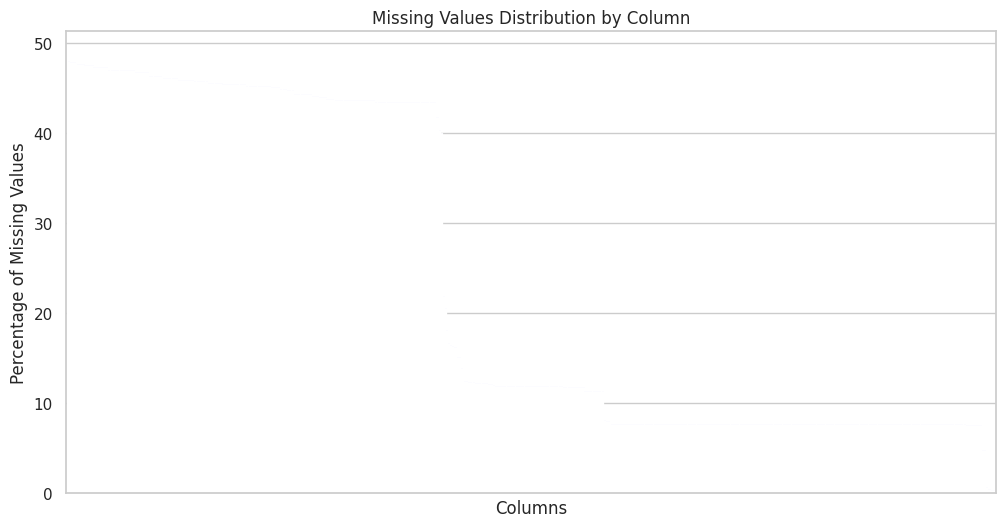

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize new distribution of missing values of our data
missing_values = dropped_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="blue")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution by Column")
plt.xticks([])
plt.show()


By looking at the plot we see that we could probably drop all of the columns that have 40-50% missing values. After removing those, the missing value percentage of the columns left drop drastically to around 10%.

In [ ]:
dropped2_df.isnull().sum()

UNITID                          0
OPEID                          26
OPEID6                         26
INSTNM                          0
CITY                            0
                             ... 
BBRR4_PP_NOMALE_MAKEPROG        0
BBRR4_PP_NOMALE_PAIDINFULL      0
BBRR4_PP_NOMALE_DISCHARGE       0
CONTROL_PEPS                   30
ADDR                          498
Length: 650, dtype: int64

**Analysis**

As a starting point, we dropped all columns of greater than 50% nulls. Using the 50% threshold, we dropped 2,355 columns, leaving us with 950. While some of these features may have presented valuable information, having to impute over 50% would materially dilute its accuracy. Additionally, given the large number of features in the data, removing these null-heavy columns would likely not undermine any underlying patterns in the data.

After dropping columns at the 50% threshold, we plotted the percentage of nulls in the remaining columns and saw that there were distinct “cliffs” at around 45% and 10%, but ultimately decided to maintain the 50% threshold to maintain access to the most useful information.

### Feature Selection using Qualitative Criteria from ChatGPT

In [ ]:
# Selected columns

selected_columns = [
    # Institutional Characteristics
    'PREDDEG',  # Predominant degree awarded
    'HIGHDEG',  # Highest degree awarded
    'CONTROL',  # Type of institution control
    'LOCALE',  # Degree of urbanization
    'CCBASIC',  # Carnegie Classification - Basic
    'CCUGPROF',  # Carnegie Classification - Undergraduate instructional program
    'CCSIZSET',  # Carnegie Classification - Size and setting
    'HBCU',  # Historically Black Colleges and Universities (1 = Yes, 0 = No)
    'HSI',  # Hispanic-Serving Institutions (1 = Yes, 0 = No)
    'DISTANCEONLY',  # Online-only institution (1 = Yes, 0 = No)

    # Location & Region
    'LATITUDE',  # Institution Latitude
    'LONGITUDE',  # Institution Longitude
    'ST_FIPS',  # State FIPS code
    'REGION',  # Geographic region

    # Student Demographics
    'UGDS',  # Total undergraduate student enrollment
    'PPTUG_EF',  # Part-time undergraduate enrollment share
    'UGDS_WHITE',  # White students' share of enrollment
    'UGDS_BLACK',  # Black students' share of enrollment
    'UGDS_HISP',  # Hispanic students' share of enrollment
    'UGDS_ASIAN',  # Asian students' share of enrollment
    'UGDS_AIAN',  # American Indian/Alaska Native share of enrollment
    'UGDS_NHPI',  # Native Hawaiian/Pacific Islander share of enrollment
    'UGDS_2MOR',  # Two or more races share of enrollment
    'UGDS_NRA',  # Non-resident aliens (international students)

    # Academic Offerings
    'PCIP14',  # Percentage of degrees in Engineering
    'PCIP11',  # Percentage of degrees in Computer Science
    'PCIP52',  # Percentage of degrees in Business, Marketing
    'PCIP51',  # Percentage of degrees in Health Professions
    'PCIP42',  # Percentage of degrees in Psychology
    'PCIP26',  # Percentage of degrees in Biological Sciences
    'PCIP45',  # Percentage of degrees in Social Sciences

    # Financials
    'NPT4_PRIV',  # Average net price for private institutions
    'NPT41_PRIV',  # Net price for $0-$30K family income (private)
    'NUM4_PRIV',  # Number of Title IV students (private institutions)

    # Outcomes
    'OMAWDP8_FTFT',  # Outcome metric for award pooling
    'CURROPER'  # School currently operating (1 = Yes, 0 = No)
]

# Filter dataframe
filtered_df = dropped_df[selected_columns]


print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")

['PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'HSI', 'DISTANCEONLY', 'LATITUDE', 'LONGITUDE', 'ST_FIPS', 'REGION', 'UGDS', 'PPTUG_EF', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'PCIP14', 'PCIP11', 'PCIP52', 'PCIP51', 'PCIP42', 'PCIP26', 'PCIP45', 'NPT4_PRIV', 'NPT41_PRIV', 'NUM4_PRIV', 'OMAWDP8_FTFT', 'CURROPER']
New DataFrame shape: (6484, 36)


**Analysis**

Having exhausted our ability to drop columns using null thresholds pragmatically, we needed to find a way to narrow the column count even further. Since there were still 650 remaining, we knew we would have to reduce the number of features using qualitative reasoning. However, having the team comb through all 650 columns to judge what columns to keep and drop would be time-consuming and introduce human error. To remedy this, we fed the 650-column Data Frame and data dictionary into ChatGPT and then asked which columns would be most important to keep to produce a reliable clustering output. This resulted in the 36 features in the code directly above. We felt that this was an ideal usage of Gen AI in a real-world context, as it saved the immense time and effort the team would have spent on this intermediate step.

*ChatGPT promt used to select Columns and generate selection code with feature description*

https://chatgpt.com/share/67b4eab5-8604-8005-a803-9dd8a2a14553

### Further cleaning on dataset based on feature selection results

In [ ]:
filtered_df.isnull().sum()

PREDDEG            0
HIGHDEG            0
CONTROL            0
LOCALE           495
CCBASIC          495
CCUGPROF         495
CCSIZSET         495
HBCU             498
HSI              498
DISTANCEONLY     495
LATITUDE         495
LONGITUDE        495
ST_FIPS            0
REGION             0
UGDS             768
PPTUG_EF         796
UGDS_WHITE       768
UGDS_BLACK       768
UGDS_HISP        768
UGDS_ASIAN       768
UGDS_AIAN        768
UGDS_NHPI        768
UGDS_2MOR        768
UGDS_NRA         768
PCIP14           773
PCIP11           773
PCIP52           773
PCIP51           773
PCIP42           773
PCIP26           773
PCIP45           773
NPT4_PRIV       3052
NPT41_PRIV      3116
NUM4_PRIV       3052
OMAWDP8_FTFT    2975
CURROPER           0
dtype: int64

In [ ]:
# Drop columns from filtered_df
columns_to_drop = ['NPT4_PRIV', 'NPT41_PRIV', 'NUM4_PRIV', 'OMAWDP8_FTFT']

filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')

print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")

['PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'HSI', 'DISTANCEONLY', 'LATITUDE', 'LONGITUDE', 'ST_FIPS', 'REGION', 'UGDS', 'PPTUG_EF', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'PCIP14', 'PCIP11', 'PCIP52', 'PCIP51', 'PCIP42', 'PCIP26', 'PCIP45', 'CURROPER']
New DataFrame shape: (6484, 32)


**Analysis**

In [ ]:
# KNN Imputation

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Apply KNN
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_data = knn_imputer.fit_transform(scaled_data)

# Convert to original scale
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_data), columns=filtered_df.columns)

print(imputed_df.isnull().sum())

PREDDEG         0
HIGHDEG         0
CONTROL         0
LOCALE          0
CCBASIC         0
CCUGPROF        0
CCSIZSET        0
HBCU            0
HSI             0
DISTANCEONLY    0
LATITUDE        0
LONGITUDE       0
ST_FIPS         0
REGION          0
UGDS            0
PPTUG_EF        0
UGDS_WHITE      0
UGDS_BLACK      0
UGDS_HISP       0
UGDS_ASIAN      0
UGDS_AIAN       0
UGDS_NHPI       0
UGDS_2MOR       0
UGDS_NRA        0
PCIP14          0
PCIP11          0
PCIP52          0
PCIP51          0
PCIP42          0
PCIP26          0
PCIP45          0
CURROPER        0
dtype: int64


In [ ]:
imputed_df.head()
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PREDDEG       6484 non-null   float64
 1   HIGHDEG       6484 non-null   float64
 2   CONTROL       6484 non-null   float64
 3   LOCALE        6484 non-null   float64
 4   CCBASIC       6484 non-null   float64
 5   CCUGPROF      6484 non-null   float64
 6   CCSIZSET      6484 non-null   float64
 7   HBCU          6484 non-null   float64
 8   HSI           6484 non-null   float64
 9   DISTANCEONLY  6484 non-null   float64
 10  LATITUDE      6484 non-null   float64
 11  LONGITUDE     6484 non-null   float64
 12  ST_FIPS       6484 non-null   float64
 13  REGION        6484 non-null   float64
 14  UGDS          6484 non-null   float64
 15  PPTUG_EF      6484 non-null   float64
 16  UGDS_WHITE    6484 non-null   float64
 17  UGDS_BLACK    6484 non-null   float64
 18  UGDS_HISP     6484 non-null 

In [ ]:
# Convert necessary variables to categorical

categorical_columns = [
    'PREDDEG', 'HIGHDEG', 'CONTROL', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET',
    'HBCU', 'HSI', 'DISTANCEONLY', 'CURROPER', 'ST_FIPS', 'REGION'
]

imputed_df[categorical_columns] = imputed_df[categorical_columns].astype('category')


print(imputed_df.dtypes)

PREDDEG         category
HIGHDEG         category
CONTROL         category
LOCALE          category
CCBASIC         category
CCUGPROF        category
CCSIZSET        category
HBCU            category
HSI             category
DISTANCEONLY    category
LATITUDE         float64
LONGITUDE        float64
ST_FIPS         category
REGION          category
UGDS             float64
PPTUG_EF         float64
UGDS_WHITE       float64
UGDS_BLACK       float64
UGDS_HISP        float64
UGDS_ASIAN       float64
UGDS_AIAN        float64
UGDS_NHPI        float64
UGDS_2MOR        float64
UGDS_NRA         float64
PCIP14           float64
PCIP11           float64
PCIP52           float64
PCIP51           float64
PCIP42           float64
PCIP26           float64
PCIP45           float64
CURROPER        category
dtype: object


**Analysis**

The decision to use KNN was tactical because the team believed that using a SimpleImputer average to fill categorical nulls with column averages would be impractical in context, along with the fact that filling up to ~12% of a column’s data with a simple average could harm its predictive accuracy. Therefore, the team turned to KNN to impute data for these column values based on the values of the null row’s five nearest neighbors. For this KNN imputation, the entirely integer data could be scaled and then put through KNN. Given that floats represented the categorical values after KNN imputation, these values needed to be cast as categorical before running them through the Unsupervised ML workflow. The team again used ChatGPT to parse the data dictionary and provide the code to convert these features.

*ChatGPT promt used to identify and cast categorical features*

https://chatgpt.com/share/67b4eab5-8604-8005-a803-9dd8a2a14553

# **Analysis Plan**

The team will then move on to the dimensionality reduction stage, utilizing PCA, t-SNE, and UMAP as the primary methods. Since the team discovered the data shape to be non-linear, they will primarily focus on t-SNE and UMAP, as PCA is better suited for linear data. t-SNE is effective at preserving local relationships within the data and has been widely used in high-dimensional clustering applications. However, it does not maintain global structures as well as UMAP, which offers superior computational efficiency and scalability for large datasets. By applying these techniques, the team aims to visualize the data structure and improve clustering results by reducing noise from redundant features. The Elbow method will be employed to determine the optimal number of clusters for K-Means clustering using the PCA-transformed data. From there, the team plans to use Silhouette score to evaluate the quality of the K-Means clustering results. Dendrograms will also be generated to visualize the hierarchical clustering results. The Silhouette scores for different clustering solutions (K-Means and Hierarchical) will be compared to identify the best approach. UMAP and t-SNE will be applied to scaled data and transform it into a lower-dimensional representation, stored in data. The team aims to reduce the dimensionality utilizing an algorithm that focuses on preserving local neighborhood structures.Through the use of dimensionality reduction techniques, the team aims to reduce the complexity of the dataset, visualize the data structure, and improve the performance of clustering algorithms. The analysis will provide the team insights into the feature relationships and identify clusters of similar colleges based on their characteristics.

-------------------------------------------------------------------------------

<small> ¹ GeeksforGeeks. ML | KMEANS++ Algorithm. March 21, 2024. https://www.geeksforgeeks.org/ml-k-means-algorithm/.

<small> ² Fränti, P., & Ieranoja, S. “How Much Can K-Means Be Improved by Using Better Initialization and Repeats?” Pattern Recognition 93 (2019): 95–112. https://www.sciencedirect.com/science/article/pii/S0031320319301608.

<small> ³ Jolliffe, Ian T., and Jorge Cadima. "Principal Component Analysis: A Review and Recent Developments." Philosophical Transactions of the Royal Society A 374, no. 2065 (2016): 20150202. https://doi.org/10.1098/rsta.2015.0202.

<small> ⁴ van der Maaten, Laurens, and Geoffrey Hinton. “Visualizing Data Using t-SNE.” Journal of Machine Learning Research 9 (2008): 2579–2605. https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf.

<small> ⁵ McInnes, Leland, John Healy, and James Melville. "UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction." arXiv preprint arXiv:1802.03426 (2018). https://arxiv.org/abs/1802.03426.


# **Preliminary Results**

## EDA

### Correlation Matrix of Numeric Columns

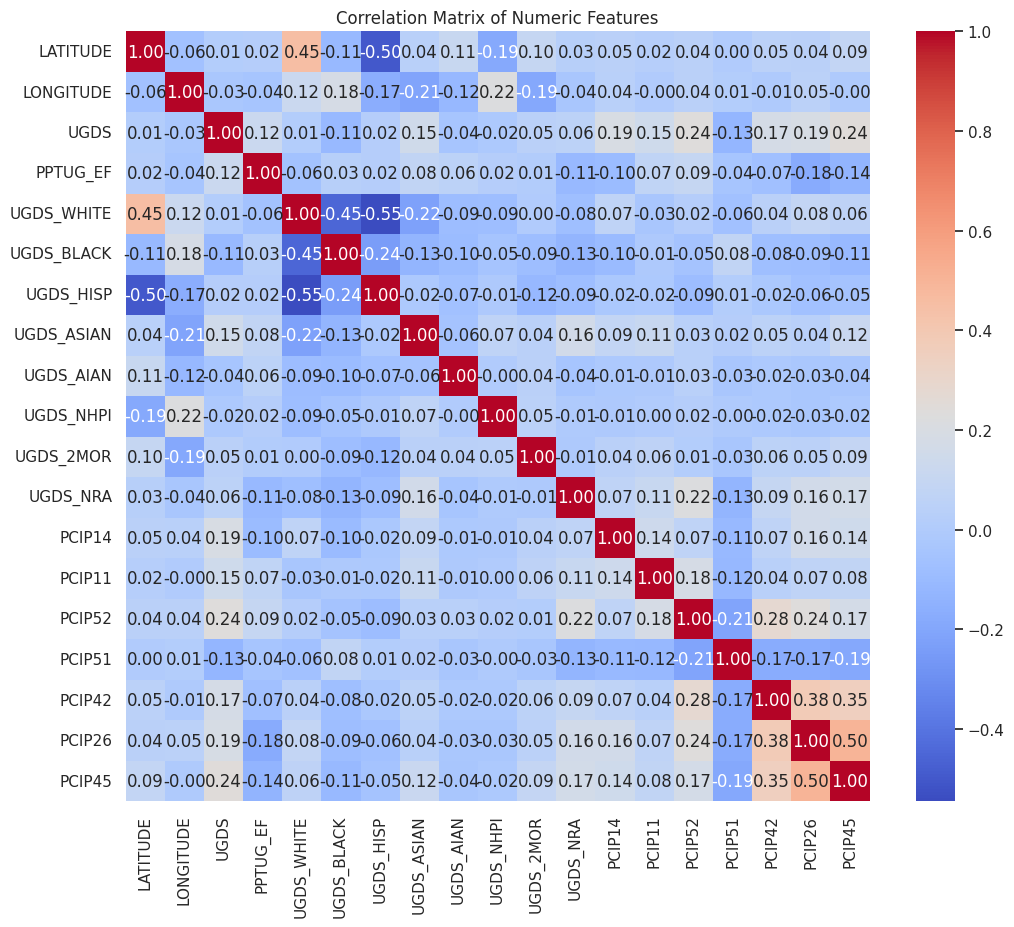

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with only numeric columns
numeric_df = imputed_df.select_dtypes(include=np.number)

# Ignore columns with 'PS' in the row values (assuming you meant column names)
numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.contains('PS')]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Pairplot - Numeric Column Interactions

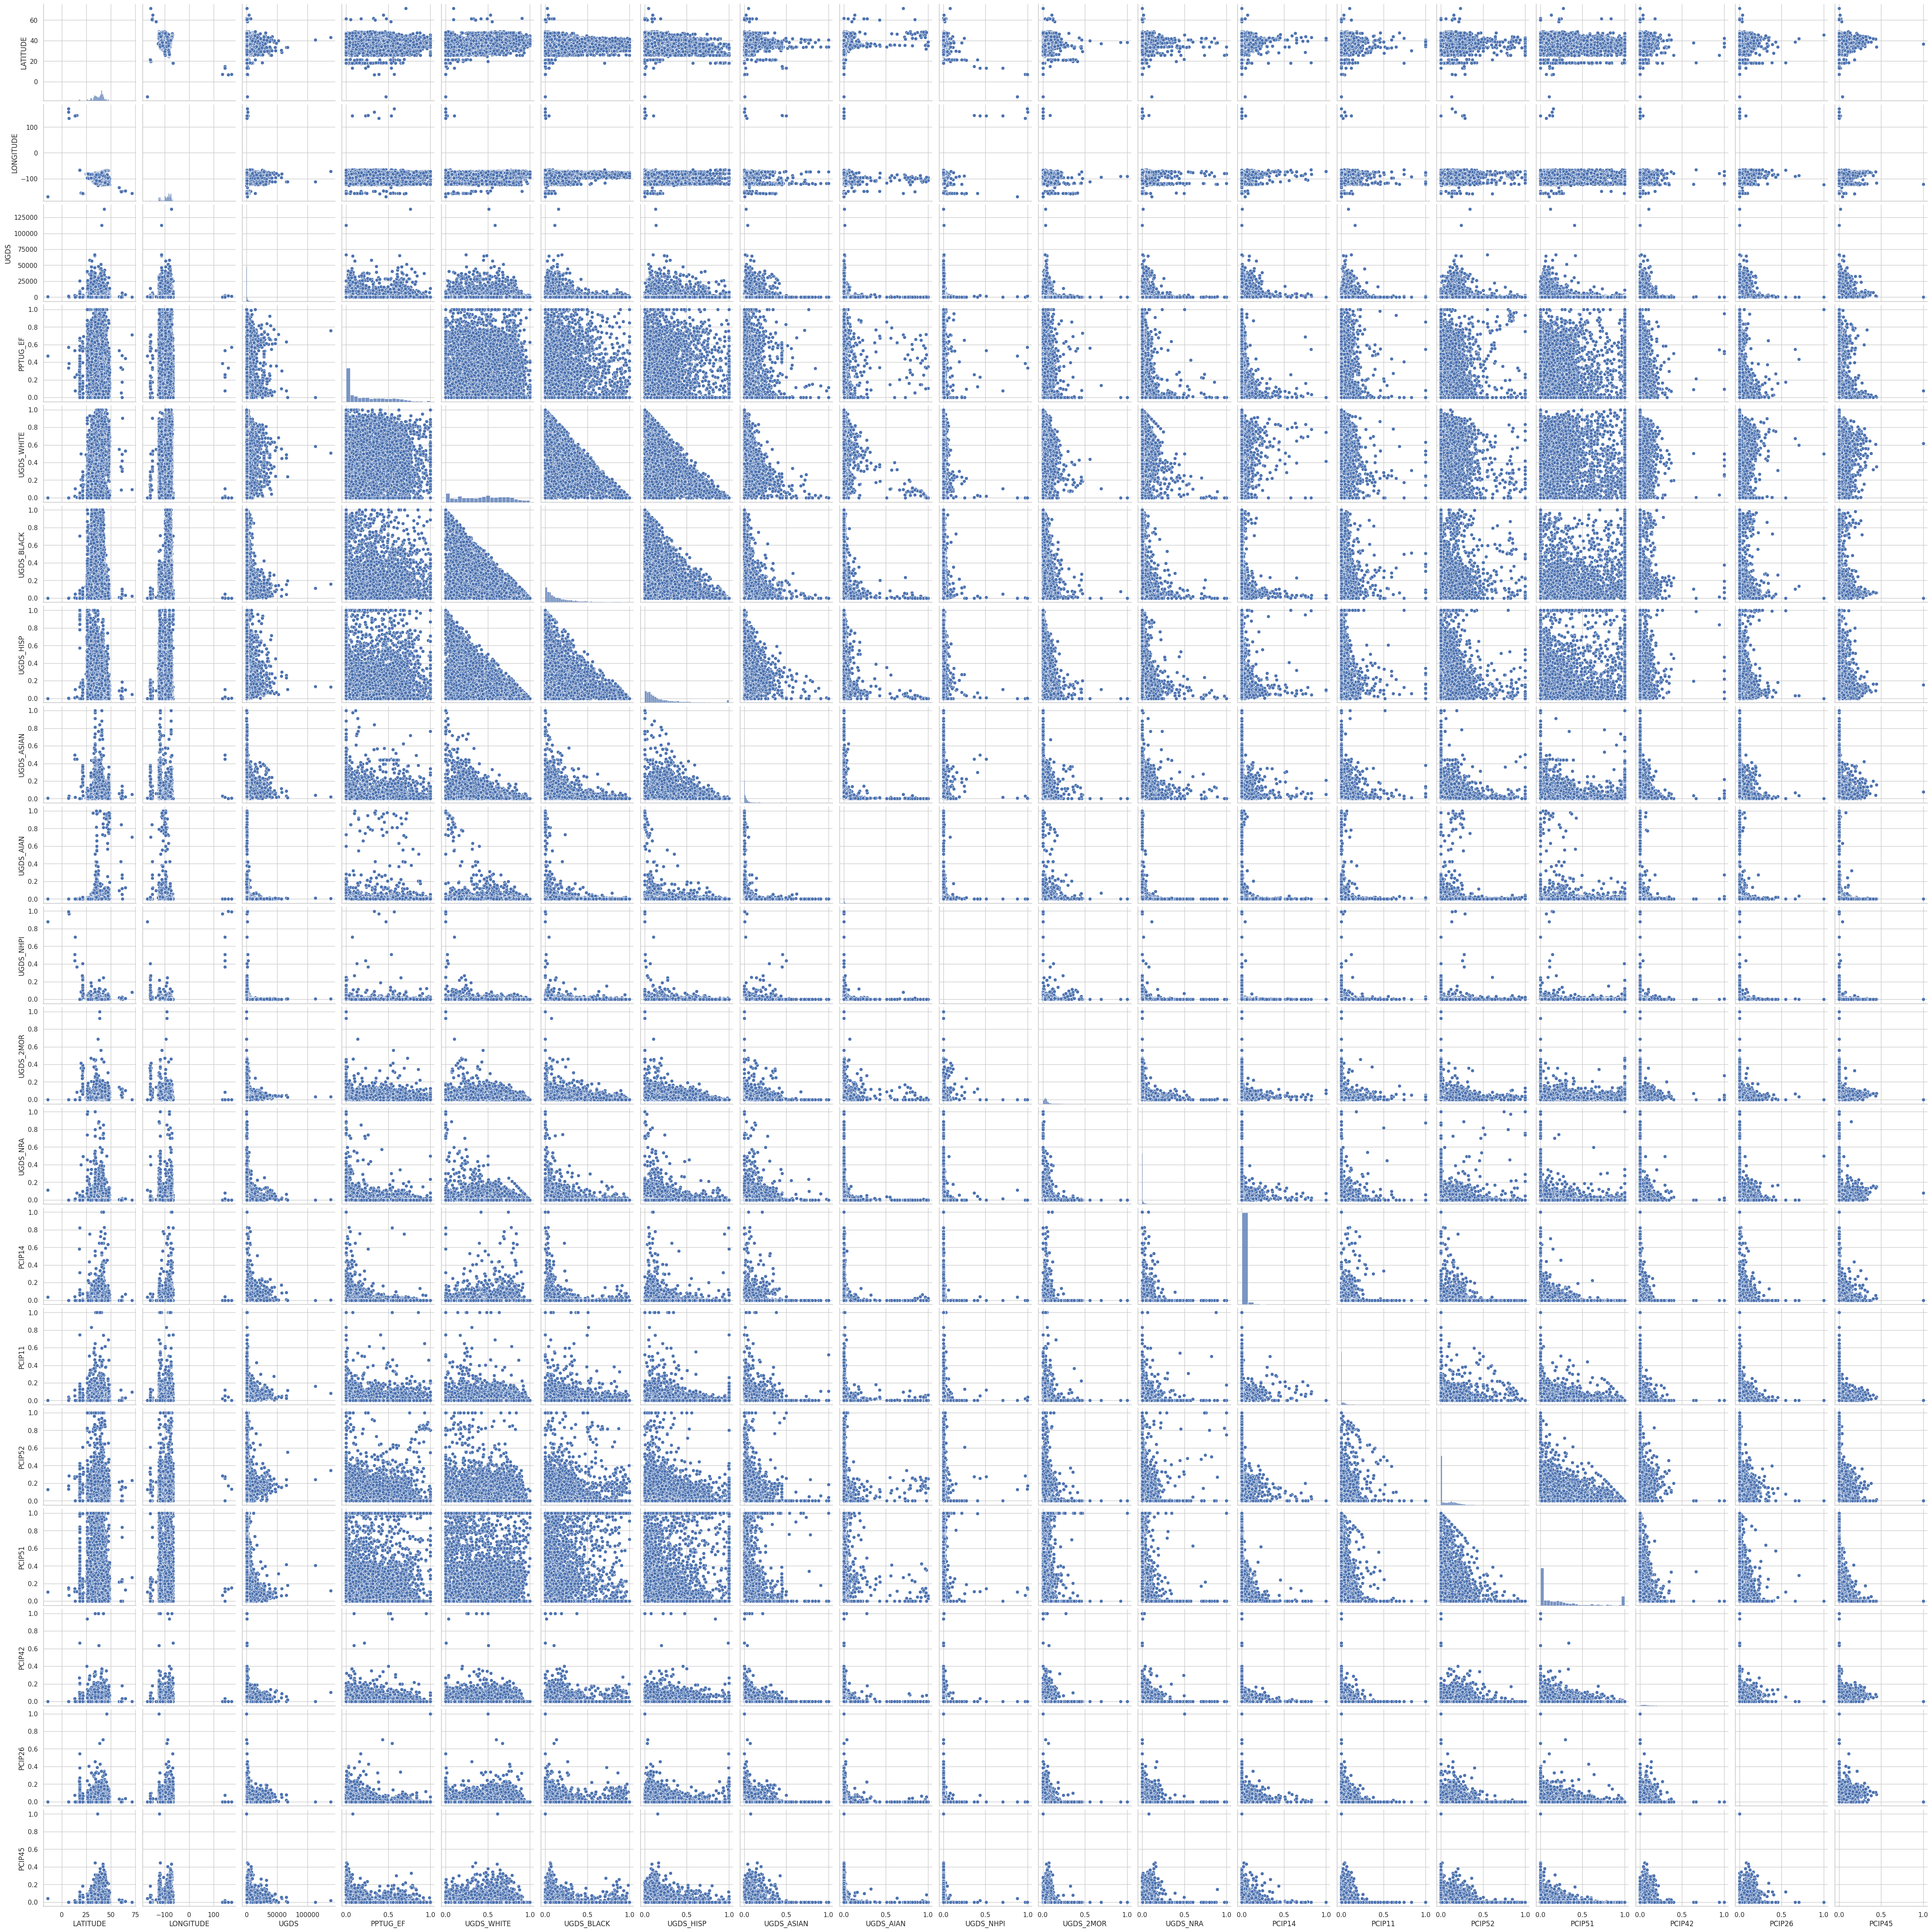

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(numeric_df)
plt.show()

In [ ]:
# Analyze Enrollment of Part-time Students
import plotly.express as px

fig = px.scatter(
    df,
    x='UGDS',
    y='PPTUG_EF',
    color='CONTROL',
    labels={'UGDS': 'Total Enrollment', 'PPTUG_EF': 'Part-time Enrollment Share', 'CONTROL': 'Institution Type'},
    title='Total Enrollment vs. Part-time Enrollment by Institution Type',
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()

### Summary Statistics on numeric data

In [ ]:
numeric_df.describe()

LATITUDE    LONGITUDE           UGDS     PPTUG_EF   UGDS_WHITE  \
count  6484.000000  6484.000000    6484.000000  6484.000000  6484.000000   
mean     37.186623   -90.334003    2373.751851     0.247739     0.445409   
std       5.852775    17.858581    5860.027216     0.261408     0.272318   
min     -14.322636  -170.742774       0.000000     0.000000     0.000000   
25%      33.889626   -97.398078     108.000000     0.002700     0.205800   
50%      38.481540   -86.131022     421.000000     0.153250     0.457100   
75%      41.155378   -79.094596    1894.250000     0.441200     0.666700   
max      71.324702   171.378129  138138.000000     1.000000     1.000000   

        UGDS_BLACK    UGDS_HISP   UGDS_ASIAN    UGDS_AIAN    UGDS_NHPI  \
count  6484.000000  6484.000000  6484.000000  6484.000000  6484.000000   
mean      0.190721     0.199553     0.045672     0.013346     0.004175   
std       0.213499     0.226837     0.085298     0.070027     0.029596   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.042775     0.050400     0.005200     0.000000     0.000000   
50%       0.111100     0.113200     0.017630     0.002300     0.000400   
75%       0.264100     0.263700     0.044400     0.006700     0.002400   
max       1.000000     1.000000     1.000000     1.000000     0.998000   

         UGDS_2MOR     UGDS_NRA       PCIP14       PCIP11       PCIP52  \
count  6484.000000  6484.000000  6484.000000  6484.000000  6484.000000   
mean      0.034991     0.021623     0.010751     0.025979     0.081077   
std       0.043295     0.061902     0.052133     0.064064     0.128283   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.007800     0.000000     0.000000     0.000000     0.000000   
50%       0.028500     0.000900     0.000000     0.000000     0.008550   
75%       0.046300     0.019600     0.000000     0.032500     0.136100   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            PCIP51        PCIP42       PCIP26       PCIP45  
count  6484.000000  6.484000e+03  6484.000000  6484.000000  
mean      0.252529  2.039686e-02     0.018343     0.015423  
std       0.326510  5.011254e-02     0.045068     0.043418  
min       0.000000 -3.469447e-18     0.000000     0.000000  
25%       0.000000  0.000000e+00     0.000000     0.000000  
50%       0.112300  0.000000e+00     0.000000     0.000000  
75%       0.357225  2.612000e-02     0.009500     0.003440  
max       1.000000  1.000000e+00     1.000000     1.000000

**Analysis of findings from EDA:**

The chosen dataset contains aggregate data for 6,484 US colleges for the 2022-2023 school year. This dataset is the most up-to-date publicly available data for US institutions and was sourced directly from the College Scorecard website (Linked in Appendix), an official website operated by the U.S. Department of Education.

Our EDA phase uncovered several key summary statistics. We looked specifically at mean, variance, and standard deviation within the numeric columns we planned to use in the dimensionality reduction and clustering phase later on. To begin, we immediately noticed that the average Enrollment Size (UGDS) for undergraduate enrollment is around 2,200, but there is significant variation, as the standard deviation is very high. The median enrollment (50th percentile) is much lower, indicating that many colleges are smaller than the average. Also, for Part-Time Students (PPTUG_EF), around 30% of students, on average, attend part-time (compared to full-time, at 70%). When we observe the diversity variable (UGDS_WHITE, UGDS_BLACK, etc.), the racial and ethnic makeup of colleges varies considerably.

We were able to uncover several patterns through the EDA phase. The distribution of variables such as UGDS (Undergraduate Enrollment) shows a right skew, which indicates that most institutions have smaller enrollments with fewer large institutions. We found that this pattern is common in educational data where a majority of colleges have fewer students. In the pairplots between UGDS_WHITE (share of White students) and UGDS_BLACK (share of Black students), distinct clusters are visible, which suggests that institutions tend to have student bodies that are predominantly one race or another, reflecting regional, historical, or mission-based demographics. Plots involving LATITUDE and various academic offerings like PCIP14 (Percentage of degrees in Engineering) do not show any discernible pattern. The lack of correlation in this area shows us that the geographic location of the institution does not necessarily influence students’ specialization in their specific academic field. (Figure 3). The pairplot exposed other unusual patterns (see Figure 4) such as non-linear relationships. For example, the relationship between UGDS (total undergraduate enrollment) and PPTUG_EF (part-time undergraduate enrollment share) appears to have a curved pattern, indicating a complex relationship. We did not qualify any data points as outliers, as we needed to consider each one in our analysis and include college data that may have an influence down the line for our recommendations. Outside of our plots in the EDA phase, we observed interesting patterns such as TUITFTE and INEXPFTE having a moderate positive correlation, which suggests that institutions with higher tuition and fees tend to have higher instructional expenses.

The data required substantial preprocessing before applying advanced machine learning models. Key identified needs included Missing Value Handling: Initially, columns with more than 50% missing values were dropped. Later, the threshold was changed to 10%, resulting in the removal of more columns. KNN Imputation was used to address the remaining missing values in selected columns. Feature Selection: An external tool (ChatGPT) was employed to reduce the features qualitatively. More investigation should be done on feature importance within chosen models, to justify feature selection. Data Scaling: Data scaling was used before the KNN imputations to improve the effectiveness of the method. Scaling should be done as needed, to improve other model performance. Transitioning to our observations and further analysis, we found that the initial dataset was highly dimensional, requiring feature reduction. Additionally, correlation analysis highlighted expected and unexpected relationships between features. Outlier detection was partly addressed with correlation matrix and pairplots. The final dataset used for the unsupervised modeling had significantly fewer features and null values. Next steps involve actionable insights based on the formed clusters, mapping the clustered results back to original features, and exploring additional methods to further enhance data interpretability and modeling performance.



## Dimensionality Reduction

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(imputed_df)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA: {np.sum(explained_variance)*100:.2f}% retained with {data_pca.shape[1]} components.")

Explained Variance by PCA: 95.49% retained with 24 components.


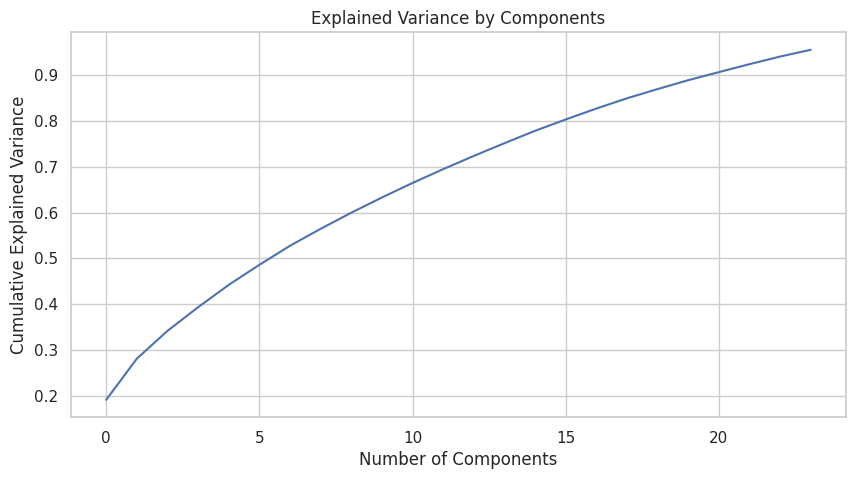

In [ ]:
# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

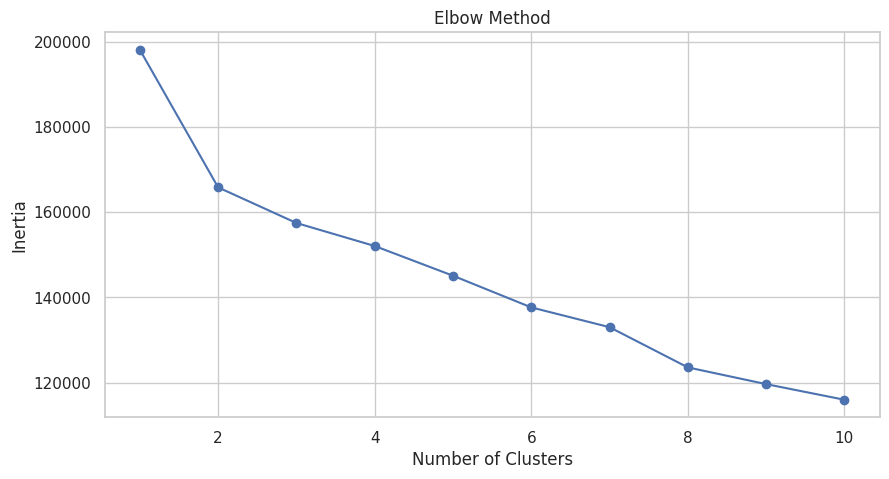

In [ ]:
from sklearn.cluster import KMeans

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)
silhouette_avg = silhouette_score(data_pca, clusters)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 4 clusters: 0.1557


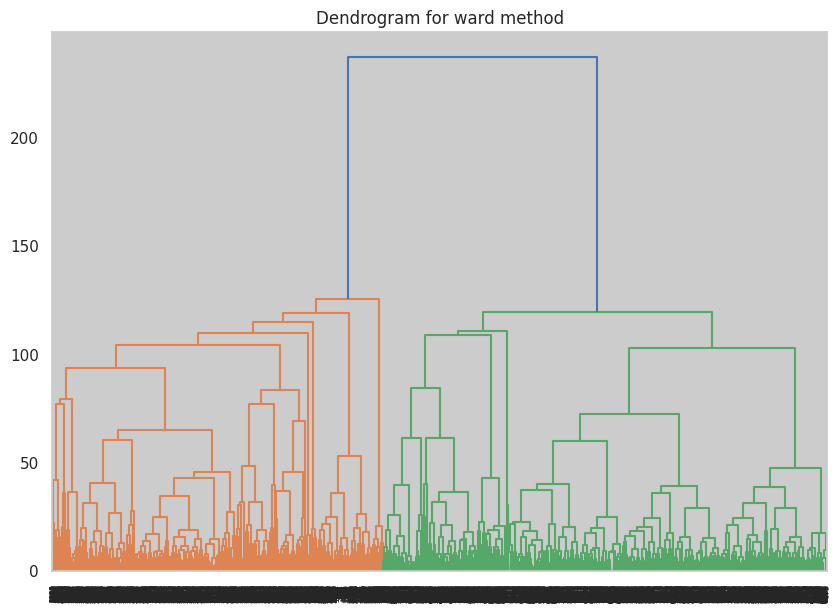

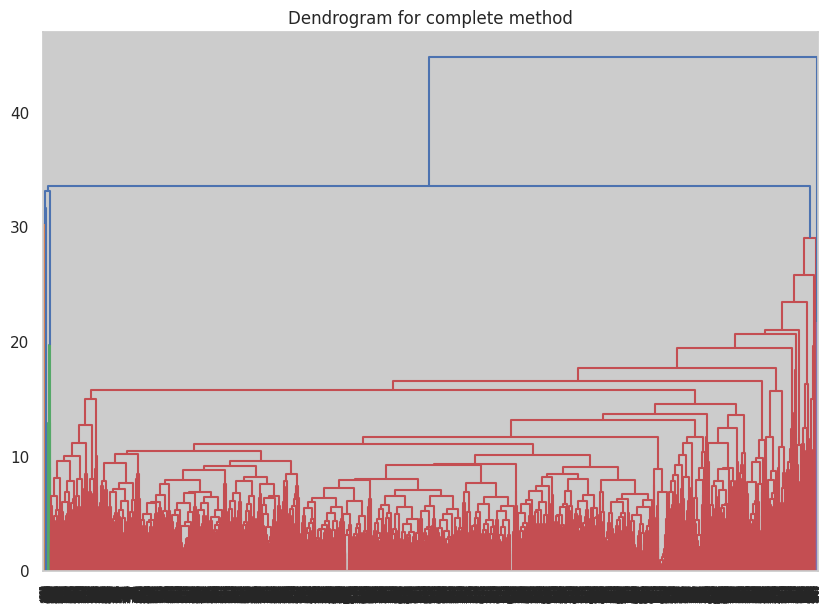

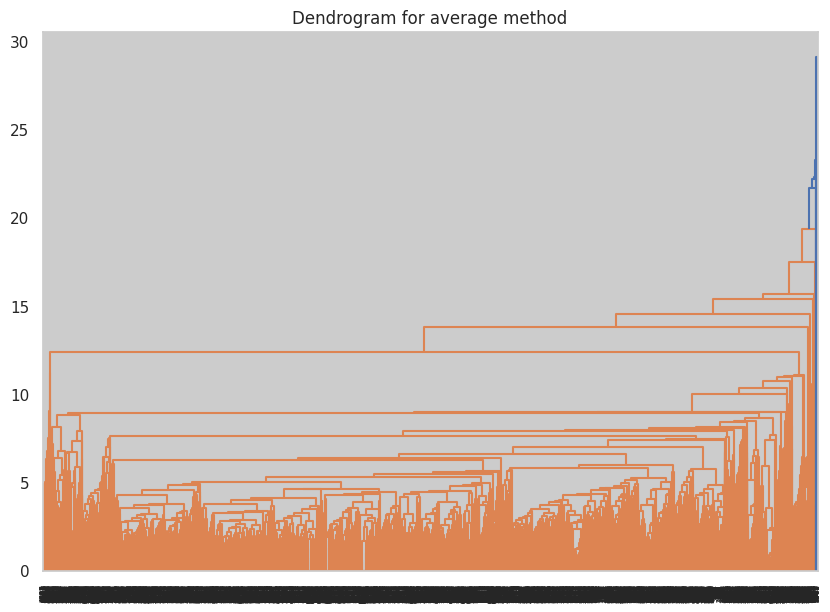

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Performing Hierarchical Clustering
linkage_methods = ['ward', 'complete', 'average']
for method in linkage_methods:
    linked = linkage(data_pca, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram for {method} method')
    plt.show()

In [ ]:
# Kmeans method - 4 clusters
print(f'Kmeans Silhouette Score for 4 clusters: {silhouette_avg:.4f}')

# Ward method - 2 clusters
ward_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
ward_labels = ward_clusters.fit_predict(data_pca)
ward_silhouette = silhouette_score(data_pca, ward_labels)
print(f"Ward Silhouette Score for 2 clusters: {ward_silhouette:.4f}")

# Complete method - 3 clusters
complete_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_clusters.fit_predict(data_pca)
complete_silhouette = silhouette_score(data_pca, complete_labels)
print(f"Complete Silhouette Score for 3 clusters: {complete_silhouette:.4f}")

# Average method - 3 clusters
average_clusters = AgglomerativeClustering(n_clusters=3, linkage='average')
average_labels = average_clusters.fit_predict(data_pca)
average_silhouette = silhouette_score(data_pca, average_labels)
print(f"Average Silhouette Score for 3 clusters: {average_silhouette:.4f}")

Kmeans Silhouette Score for 4 clusters: 0.1557
Ward Silhouette Score for 2 clusters: 0.1900
Complete Silhouette Score for 3 clusters: 0.4822
Average Silhouette Score for 3 clusters: 0.6916


### UMAP & t-SNE

In [ ]:
pip install umap-learn

In [ ]:
import umap.umap_ as umap

# UMAP
umap_reducer = umap.UMAP()
data_umap = umap_reducer.fit_transform(data_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
# Visualizations
fig_tsne = px.scatter(x=data_tsne[:, 0], y=data_tsne[:, 1], color=clusters, labels={'x': 't-SNE 1', 'y': 't-SNE 2'}, title='t-SNE Clustering')
fig_umap = px.scatter(x=data_umap[:, 0], y=data_umap[:, 1], color=clusters, labels={'x': 'UMAP 1', 'y': 'UMAP 2'}, title='UMAP Clustering')
fig_tsne.show()
fig_umap.show()

In [ ]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

clusters_umap = kmeans.fit_predict(data_umap)
silhouette_umap = silhouette_score(data_umap, clusters_umap)
print(f"UMAP Silhouette Score: {silhouette_umap}")

clusters_tsne = kmeans.fit_predict(data_tsne)
silhouette_tsne = silhouette_score(data_tsne, clusters_tsne)
print(f"t-SNE Silhouette Score: {silhouette_tsne}")

UMAP Silhouette Score: 0.4813086986541748
t-SNE Silhouette Score: 0.4272249937057495


# **Next Steps**

Based on our preliminary results, we have created a detailed plan of further action to be taken on our dataset and model, with the intentions of ultimately being able to rate and rank colleges based on their value:

1) Develop actionable insights based on analysis of cluster characteristics: we will now analyze the characteristics of each cluster based on the original features. This will help us understand what makes each cluster unique and to identify the main factors driving the clustering. Based on the cluster analysis, we will then generate actionable insights for prospective students (our main stakeholders). This will include recommendations for colleges based on student's areas of academic interests, finances, and desired outcomes. We aim to provide personalized recommendations by matching student profiles to the specific clusters we created that best align with their needs.


2) Map clustered results back to the original feature space to identify universities and their characteristics. This includes using inverse transform to reconstruct the approximate values of the original variables. We will then merge the original dataset with the cluster labels based on the row index and make sure our variable "UNITID" is included, which has the insitution ID. By mapping our results back to original variables, we will be able to analyze why each university falls into a given cluster but will also allow us to check the validity of our results and assess if any modifications are necessary.

In [ ]:
print(len(df), len(data_pca))

6484 6484


In [ ]:
# Add names to imputed_df

imputed_df['INSTNM'] = inst_names.values

In [ ]:
# Map back results from hierarchical clustering

imputed_df["Average_Cluster"] = average_labels
university_clusters1 = imputed_df[["INSTNM", "Average_Cluster"]]
print(university_clusters1.head())

print(imputed_df["Average_Cluster"].value_counts())

                                INSTNM  Average_Cluster
0             Alabama A & M University                0
1  University of Alabama at Birmingham                0
2                   Amridge University                0
3  University of Alabama in Huntsville                0
4             Alabama State University                0
Average_Cluster
0    6475
1       8
2       1
Name: count, dtype: int64


In [ ]:
# Map back results from UMAP
imputed_df["UMAP_Cluster"] = clusters_umap
imputed_df["tSNE_Cluster"] = clusters_tsne

university_clusters2 = imputed_df[["INSTNM", "UMAP_Cluster", "tSNE_Cluster"]]
print(imputed_df["UMAP_Cluster"].value_counts())
university_clusters2.head()

UMAP_Cluster
0    2929
1    2646
2     768
3     141
Name: count, dtype: int64


INSTNM  UMAP_Cluster  tSNE_Cluster
0             Alabama A & M University             2             0
1  University of Alabama at Birmingham             0             0
2                   Amridge University             2             0
3  University of Alabama in Huntsville             0             0
4             Alabama State University             2             0

In [ ]:
# Summary Statistics
numeric_cols = imputed_df.select_dtypes(include=["number"]).columns
cluster_summary = imputed_df.groupby("UMAP_Cluster")[numeric_cols].agg(["mean", "std", "min", "max"])
print(cluster_summary)

               LATITUDE                                  LONGITUDE             \
                   mean       std        min        max       mean        std   
UMAP_Cluster                                                                    
0             38.638942  4.742647  18.006633  64.857560 -89.218755  14.894048   
1             36.229681  6.173037 -14.322636  61.181443 -90.521074  20.631157   
2             34.381698  6.728257  17.966350  48.437194 -94.060334  18.167830   
3             40.253344  5.814962  29.377858  71.324702 -89.693943  13.266167   

                                             UGDS                ...  \
                     min         max         mean           std  ...   
UMAP_Cluster                                                     ...   
0            -157.926586  -66.056084  2959.544691   4994.974241  ...   
1            -170.742774  171.378129   262.855253    717.696447  ...   
2            -124.195293  -64.972866  6300.944010  10910.788542  ...   


In [ ]:
final_clustered_df = imputed_df.drop(columns=['tSNE_Cluster', 'Average_Cluster'])
final_clustered_df.head()

PREDDEG HIGHDEG CONTROL LOCALE CCBASIC CCUGPROF CCSIZSET HBCU  HSI  \
0     3.0     4.0     1.0   12.0    18.0     10.0     14.0  1.0  0.0   
1     3.0     4.0     1.0   12.0    15.0      9.0     15.0  0.0  0.0   
2     3.0     4.0     2.0   12.0    20.0      5.0      6.0  0.0  0.0   
3     3.0     4.0     1.0   12.0    15.0     15.0     13.0  0.0  0.0   
4     3.0     4.0     1.0   12.0    17.0     10.0     14.0  1.0  0.0   

  DISTANCEONLY  ...  PCIP14  PCIP11  PCIP52  PCIP51  PCIP42  PCIP26  PCIP45  \
0          0.0  ...  0.1076  0.0802  0.1526  0.0000  0.0744  0.1644  0.0313   
1          0.0  ...  0.0600  0.0241  0.1934  0.2213  0.0792  0.1250  0.0265   
2          1.0  ...  0.0000  0.0000  0.4565  0.0000  0.0000  0.0000  0.0000   
3          0.0  ...  0.2924  0.0906  0.1945  0.1119  0.0249  0.0553  0.0249   
4          0.0  ...  0.0104  0.0750  0.1500  0.0500  0.0521  0.1271  0.0271   

   CURROPER                               INSTNM  UMAP_Cluster  
0       1.0             Alabama A & M University             2  
1       1.0  University of Alabama at Birmingham             0  
2       1.0                   Amridge University             2  
3       1.0  University of Alabama in Huntsville             0  
4       1.0             Alabama State University             2  

[5 rows x 34 columns]

In [ ]:
final_clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PREDDEG       6484 non-null   category
 1   HIGHDEG       6484 non-null   category
 2   CONTROL       6484 non-null   category
 3   LOCALE        6484 non-null   category
 4   CCBASIC       6484 non-null   category
 5   CCUGPROF      6484 non-null   category
 6   CCSIZSET      6484 non-null   category
 7   HBCU          6484 non-null   category
 8   HSI           6484 non-null   category
 9   DISTANCEONLY  6484 non-null   category
 10  LATITUDE      6484 non-null   float64 
 11  LONGITUDE     6484 non-null   float64 
 12  ST_FIPS       6484 non-null   category
 13  REGION        6484 non-null   category
 14  UGDS          6484 non-null   float64 
 15  PPTUG_EF      6484 non-null   float64 
 16  UGDS_WHITE    6484 non-null   float64 
 17  UGDS_BLACK    6484 non-null   float64 
 18  UGDS_HIS

  UMAP_Cluster   LATITUDE            LONGITUDE                    UGDS  \
                     mean       std       mean        std         mean   
0            0  38.638942  4.742647 -89.218755  14.894048  2959.544691   
1            1  36.229681  6.173037 -90.521074  20.631157   262.855253   
2            2  34.381698  6.728257 -94.060334  18.167830  6300.944010   
3            3  40.253344  5.814962 -89.693943  13.266167  8427.380142   

                 PPTUG_EF           UGDS_WHITE           UGDS_BLACK            \
            std      mean       std       mean       std       mean       std   
0   4994.974241  0.272389  0.257337   0.562267  0.227717   0.135839  0.144425   
1    717.696447  0.187547  0.249047   0.378666  0.282855   0.244128  0.246519   
2  10910.788542  0.347710  0.273969   0.246277  0.189436   0.215890  0.266187   
3  13911.805371  0.320716  0.234423   0.355036  0.213754   0.191465  0.133402   

  UGDS_HISP           CURROPER  
       mean       std    count  
0 

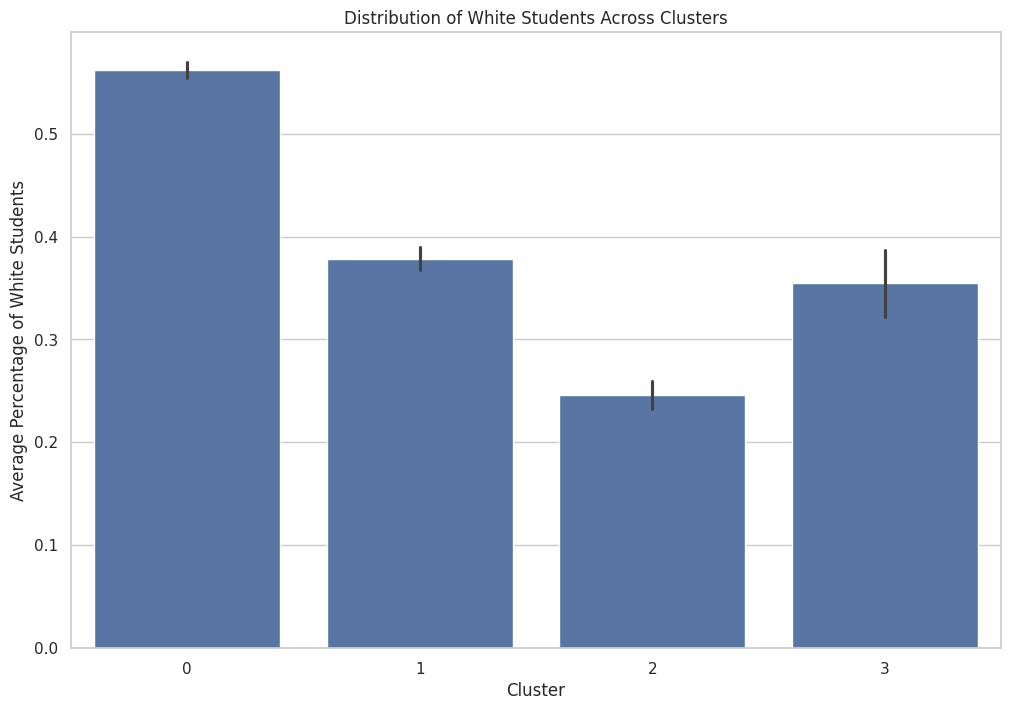

In [ ]:
# Summary statistics by cluster
cluster_summaries = final_clustered_df.groupby('UMAP_Cluster').agg({
    'LATITUDE': ['mean', 'std'],
    'LONGITUDE': ['mean', 'std'],
    'UGDS': ['mean', 'std'],
    'PPTUG_EF': ['mean', 'std'],
    'UGDS_WHITE': ['mean', 'std'],
    'UGDS_BLACK': ['mean', 'std'],
    'UGDS_HISP': ['mean', 'std'],
    'CURROPER': ['count'],
}).reset_index()

print(cluster_summaries)

# Visualize distribution of students by race (WHITE)
plt.figure(figsize=(12, 8))
sns.barplot(x='UMAP_Cluster', y='UGDS_WHITE', data=final_clustered_df)
plt.title('Distribution of White Students Across Clusters')
plt.ylabel('Average Percentage of White Students')
plt.xlabel('Cluster')
plt.show()

In [ ]:
# Define the list of variables to summarize
variables_to_summarize = [
    'UGDS', 'PPTUG_EF', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
    'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'PCIP14', 'PCIP11', 'PCIP52',
    'PCIP51', 'PCIP26', 'PCIP42', 'PCIP45', 'LATITUDE', 'LONGITUDE'
]

# Analyze and describe each cluster
for cluster in sorted(final_clustered_df['UMAP_Cluster'].unique()):
    cluster_data = final_clustered_df[final_clustered_df['UMAP_Cluster'] == cluster]
    print(f"\n--- Cluster {cluster} Summary ---")
    print(f"Average Undergraduate Enrollment: {cluster_data['UGDS'].mean():,.2f}")
    print(f"Percentage of Part-time Undergrads: {cluster_data['PPTUG_EF'].mean() * 100:.2f}%")
    print(f"Percentage of White Students: {cluster_data['UGDS_WHITE'].mean() * 100:.2f}%")
    print(f"Percentage of Black Students: {cluster_data['UGDS_BLACK'].mean() * 100:.2f}%")
    print(f"Percentage of Hispanic Students: {cluster_data['UGDS_HISP'].mean() * 100:.2f}%")
    print(f"Percentage of Asian Students: {cluster_data['UGDS_ASIAN'].mean() * 100:.2f}%")
    print(f"Percentage of AIAN Students: {cluster_data['UGDS_AIAN'].mean() * 100:.2f}%")
    print(f"Percentage of NHPI Students: {cluster_data['UGDS_NHPI'].mean() * 100:.2f}%")
    print(f"Percentage of Two or More Races Students: {cluster_data['UGDS_2MOR'].mean() * 100:.2f}%")
    print(f"Percentage of Non-resident Alien Students: {cluster_data['UGDS_NRA'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Engineering: {cluster_data['PCIP14'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Computer Science: {cluster_data['PCIP11'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Business: {cluster_data['PCIP52'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Health Professions: {cluster_data['PCIP51'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Biological Sciences: {cluster_data['PCIP26'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Psychology: {cluster_data['PCIP42'].mean() * 100:.2f}%")
    print(f"Percentage of Degrees in Social Sciences: {cluster_data['PCIP45'].mean() * 100:.2f}%")
    print(f"Average Latitude: {cluster_data['LATITUDE'].mean():.2f}")
    print(f"Average Longitude: {cluster_data['LONGITUDE'].mean():.2f}")


--- Cluster 0 Summary ---
Average Undergraduate Enrollment: 2,959.54
Percentage of Part-time Undergrads: 27.24%
Percentage of White Students: 56.23%
Percentage of Black Students: 13.58%
Percentage of Hispanic Students: 11.49%
Percentage of Asian Students: 5.90%
Percentage of AIAN Students: 1.00%
Percentage of NHPI Students: 0.23%
Percentage of Two or More Races Students: 3.64%
Percentage of Non-resident Alien Students: 3.81%
Percentage of Degrees in Engineering: 2.05%
Percentage of Degrees in Computer Science: 3.92%
Percentage of Degrees in Business: 12.59%
Percentage of Degrees in Health Professions: 21.67%
Percentage of Degrees in Biological Sciences: 3.05%
Percentage of Degrees in Psychology: 3.29%
Percentage of Degrees in Social Sciences: 2.57%
Average Latitude: 38.64
Average Longitude: -89.22

--- Cluster 1 Summary ---
Average Undergraduate Enrollment: 262.86
Percentage of Part-time Undergrads: 18.75%
Percentage of White Students: 37.87%
Percentage of Black Students: 24.41%
Perce

**Cluster 0: Mid-sized & Traditional**

This cluster represents traditional comprehensive universities with a moderate undergraduate enrollment (2,960). These institutions have majority White (56.23%) populations with relatively modest Black (13.58%) and Hispanic populations (11.49%). They offer a balanced range of degree programs, with notable emphasis on Health Professions (21.67%) and Business (12.59%). The geographical distribution indicates a Central-Midwest focus. In general, the cluster represents diverse regional mid-sized universities that emphasize degrees with a professional focus.

**Cluster 1: Small, Minority-serving, and Health-centric**

Cluster 1 institutions are characterized by much smaller average enrollments (263) and a high percentage of degrees in Health Professions (31.12%) with limited enrollment in other programs. The student body is very diverse with large Black (24.41%) and Hispanic (24.42%) populations relative to the white (37.87%) population. Located predominantly in the Southern/Central US, these schools likely include community colleges and technical schools that prepare their students for roles predominantly in Healthcare.

**Cluster 2: Hispanic, Highly Diverse, and Urban**

This cluster includes colleges with the second largest average undergraduate enrollments (6,300) and the highest percentage of Hispanic (38.74%) students. This suggests these are metropolitan/urban institutions in diverse urban areas, possibly in the southern US. These colleges have a substantial part-time student population (34.77%) and offer a range of programs, with Health Professions (17.18%) and  Business (13.63%) being prominent. The institutions in this cluster might be serving as important educational pillars in highly populated areas, reflecting the demographic diversity of their locations, likely centered in states such as Texas, Arizona, and California.

**Cluster 3: Large Schools with Heavy AIAN Representation**

Cluster 3 features colleges with the largest enrollments (8,427) and a significant representation of part-time students (32.07%). These institutions have a diverse student body but with a higher concentration of AIAN students (23.00%), suggesting locations near or within indigenous communities, possibly in the Midwest, Great Plains, or Western U.S. They offer a wide range of programs but with a notable emphasis on Health Professions (33.68%). These colleges likely play a crucial role in providing accessible education to underserved communities and promoting liberal arts alongside vocational training.

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




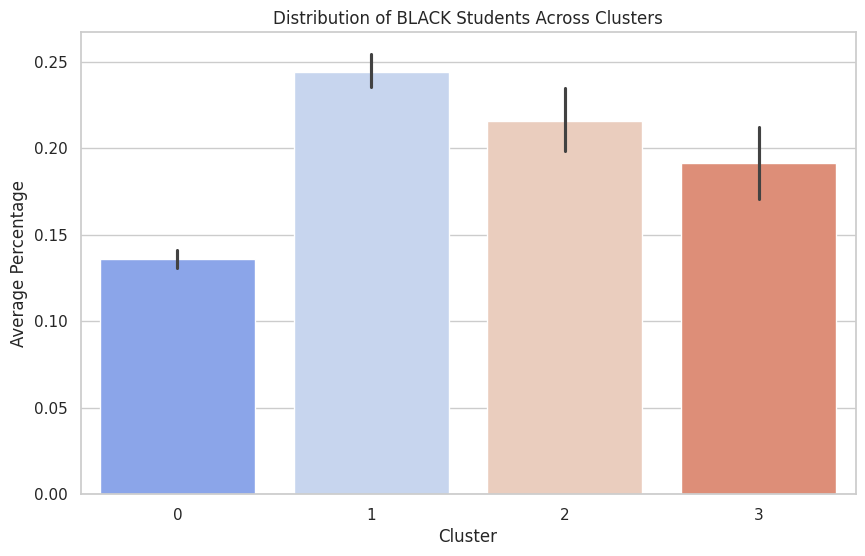

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




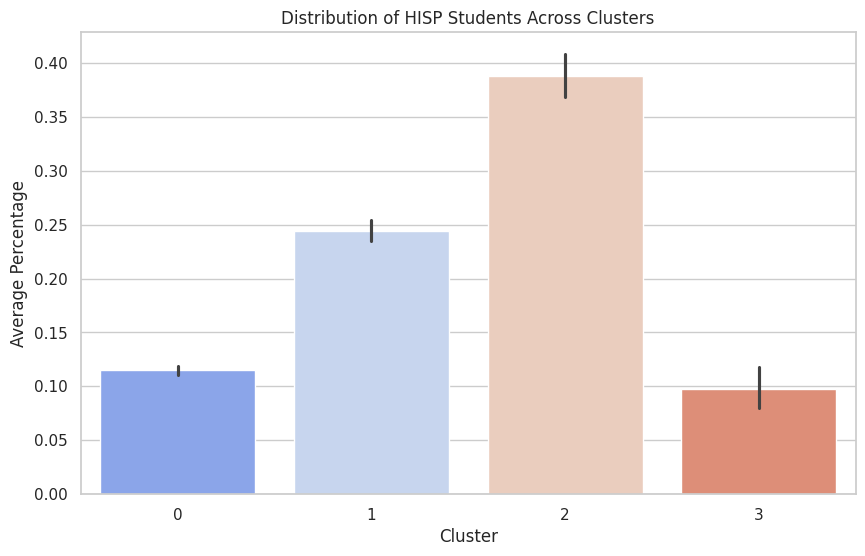

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




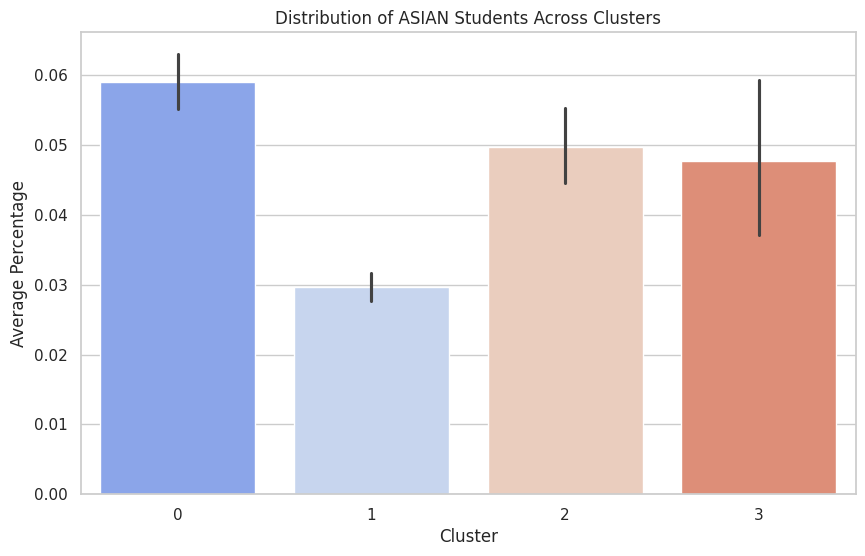

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




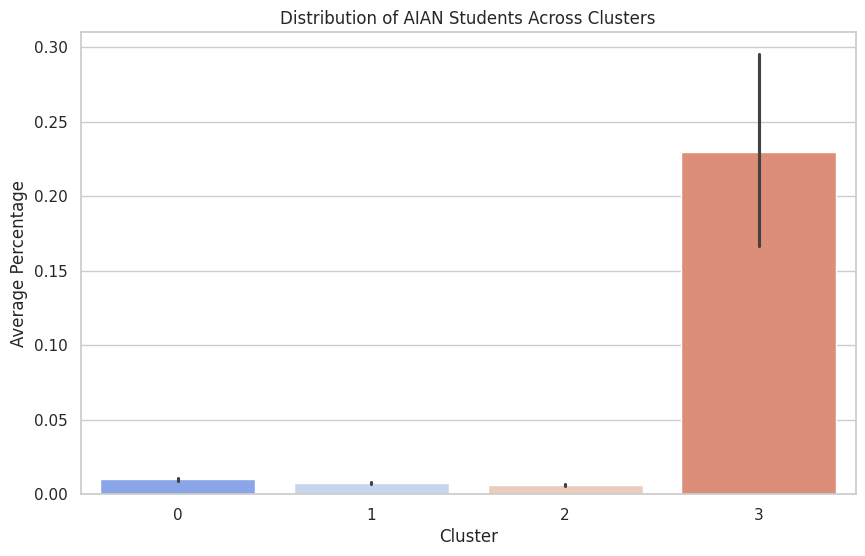

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




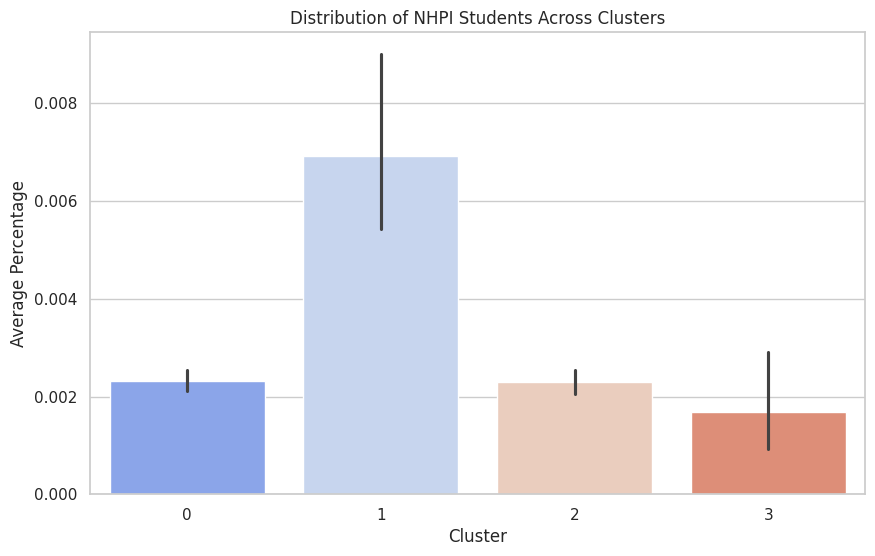

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




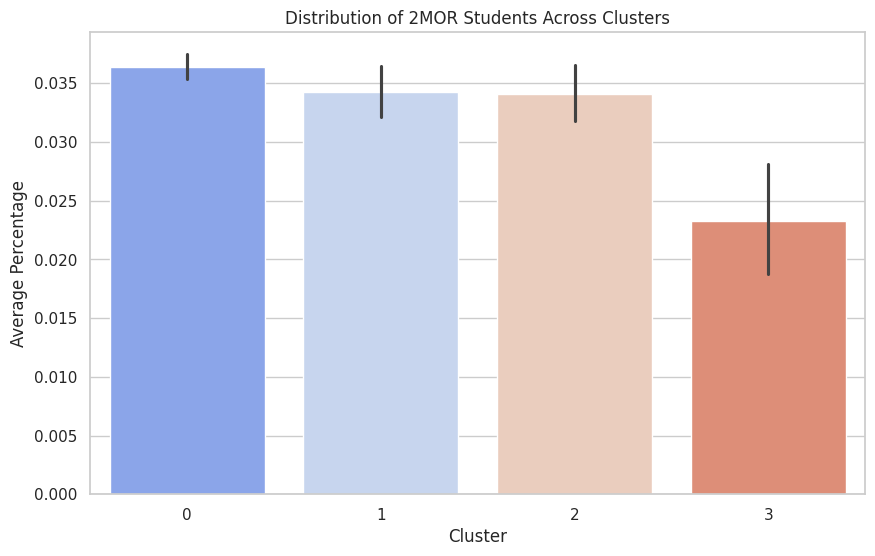

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




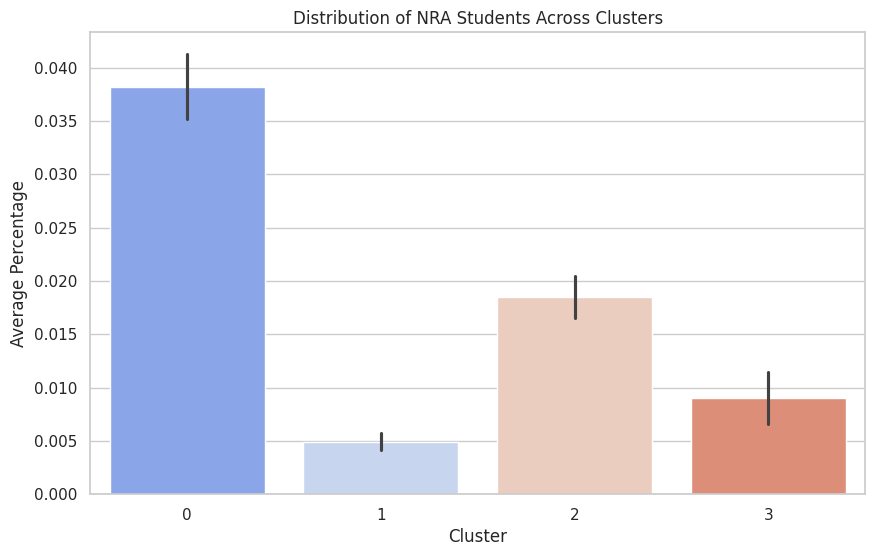

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




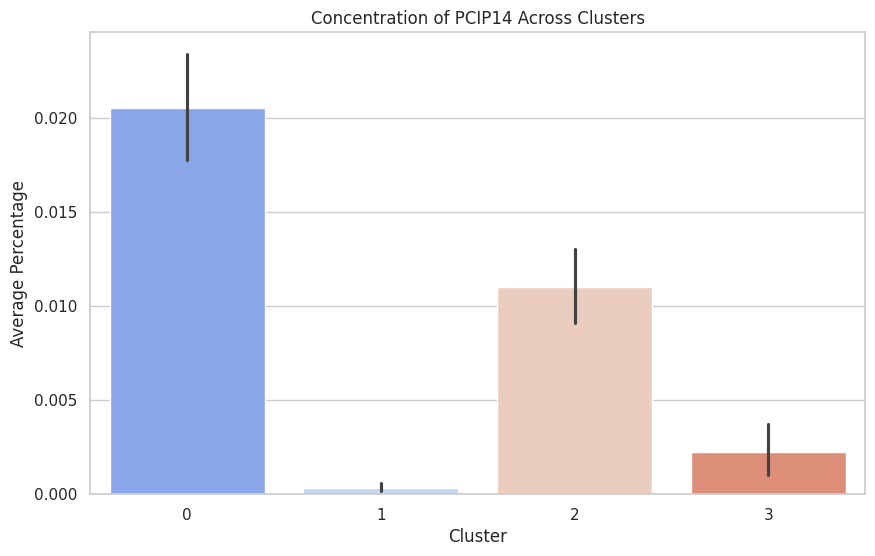

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




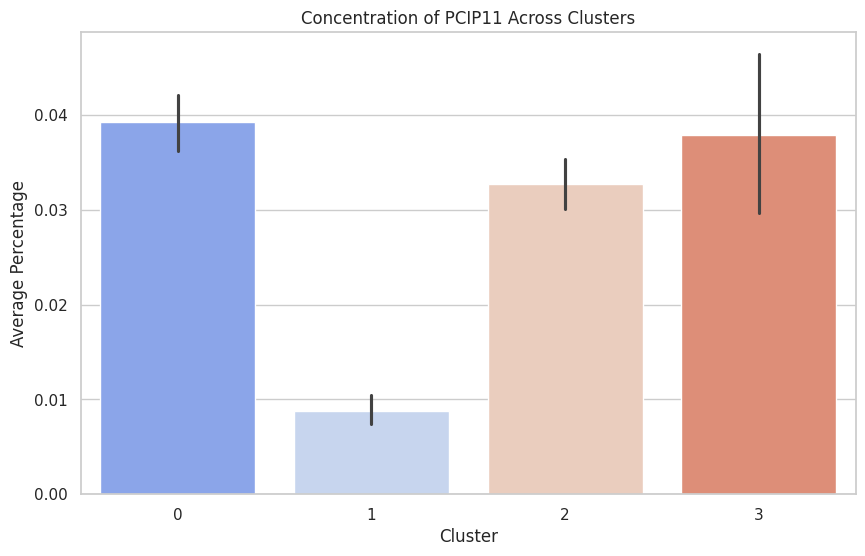

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




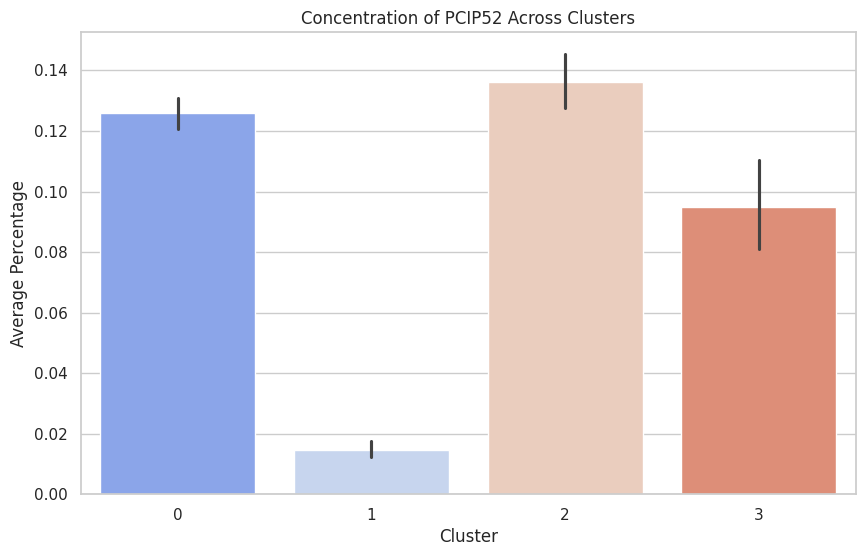

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




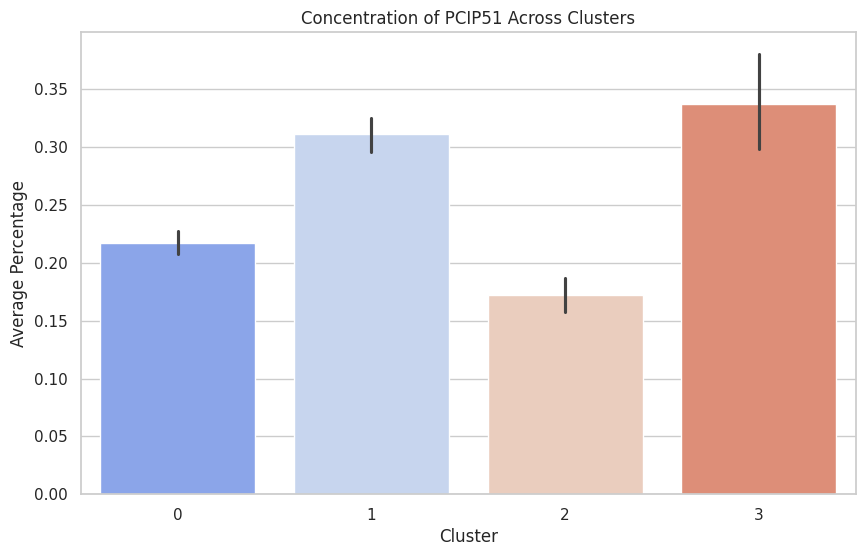

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




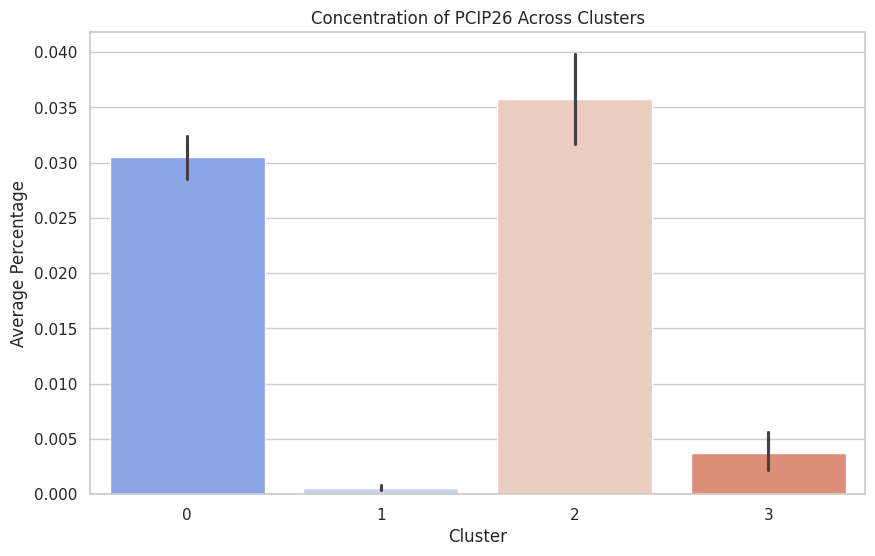

<ipython-input-182-ffc70a11cd3c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




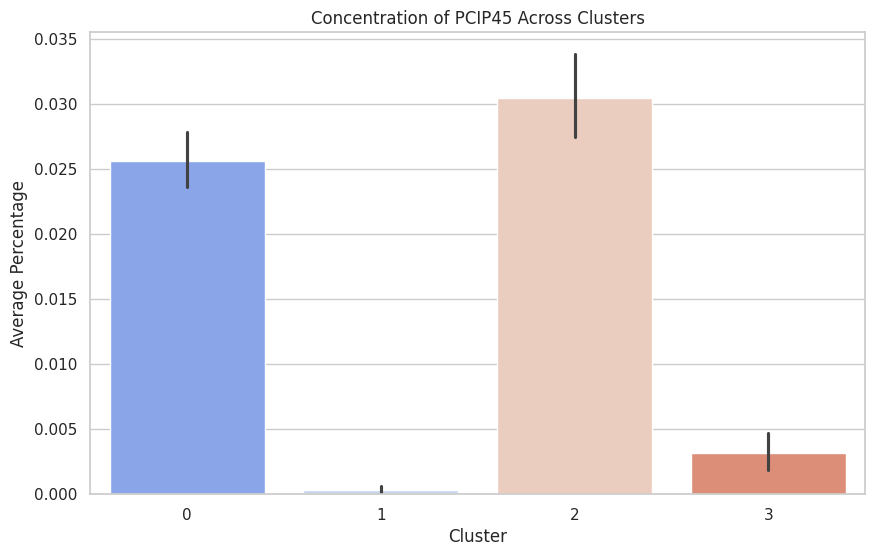

In [ ]:
# Set style
sns.set(style="whitegrid")

# Function to create bar plots
def create_bar_plots(variables, title_prefix):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='UMAP_Cluster', y=var, data=final_clustered_df, palette='coolwarm')

        # Check if variable name can be split into parts (was getting an error for this before)
        parts = var.split("_")
        if len(parts) > 1:
            title = f'{title_prefix} of {parts[1]} Students Across Clusters'
        else:
            title = f'{title_prefix} of {var} Across Clusters'
        plt.title(title)
        plt.ylabel('Average Percentage')
        plt.xlabel('Cluster')
        plt.show()

# Lists of demographic and academic variables
demographic_vars = ['UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA']
academic_vars = ['PCIP14', 'PCIP11', 'PCIP52', 'PCIP51', 'PCIP26', 'PCIP45']

# Bar plots - demographics
create_bar_plots(demographic_vars, 'Distribution')

# Bar plots - program concentrations
create_bar_plots(academic_vars, 'Concentration')